In [1]:
#%pip install xgboost

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r"D:\Work\Data Analyst\Projects\Project 1\Superstore.csv")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.shape

(9994, 21)

In [7]:
df.isnull().sum() / len(df) * 100   

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f'Total Sales: {total_sales:.2f}')
print(f'Total Profit: {total_profit:.2f}')

Total Sales: 2297200.86
Total Profit: 286397.02


In [12]:
Sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(Sales_by_category)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


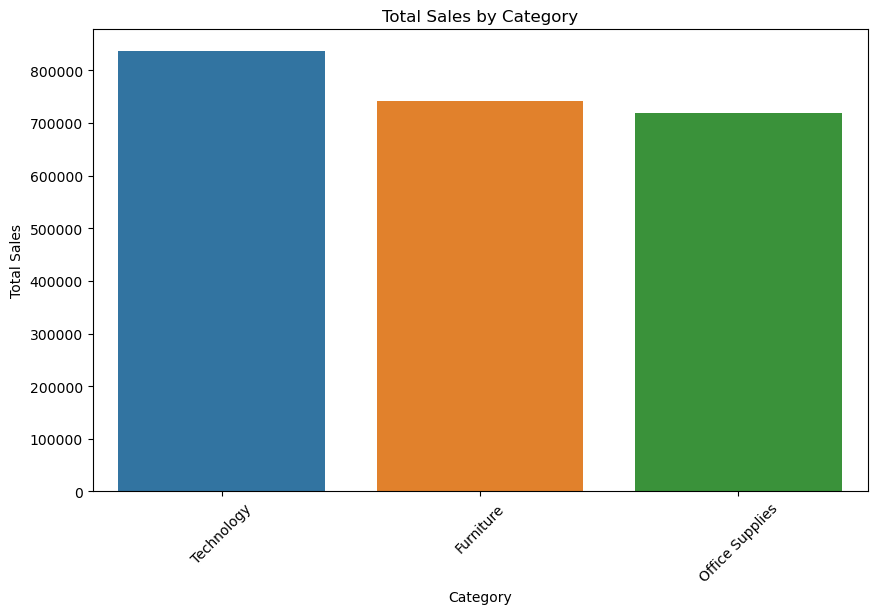

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Sales_by_category.index, y=Sales_by_category.values)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Set a reference date (e.g., max Order Date + 1 day)
sanp_shot = df['Order Date'].max() + pd.DateOffset(days=1)

In [15]:
# Calculate RFM metrics
rmf = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (sanp_shot - x.max()).days,
    'Sales': 'sum',
    'Order ID': 'count'
}).reset_index()
rmf.columns = ['Customer ID', 'Recency', 'Monetary', 'Frequency']

In [16]:
#R	Recency	How recently a customer made a purchase.
#F	Frequency	How often they purchase.
#M	Monetary	How much they spend.
rmf

,Customer ID,Recency,Monetary,Frequency
0,AA-10315,185,5563.560,11
1,AA-10375,20,1056.390,15
2,AA-10480,260,1790.512,12
3,AA-10645,56,5086.935,18
4,AB-10015,416,886.156,6
...,...,...,...,...
788,XP-21865,44,2374.658,28
789,YC-21895,5,5454.350,8
790,YS-21880,10,6720.444,12
791,ZC-21910,55,8025.707,31


In [17]:
# Score customers from 1 (worst) to 5 (best) for each metric
rmf['Recency_score'] = pd.qcut(rmf['Recency'], 5, labels=[5, 4, 3, 2, 1])
rmf['Monetary_score'] = pd.qcut(rmf['Monetary'], 5, labels=[1, 2, 3, 4, 5],duplicates='drop')
rmf['Frequency_score'] = pd.qcut(rmf['Frequency'], 5, labels=[1, 2, 3, 4, 5],duplicates='drop')



In [18]:
rmf

,Customer ID,Recency,Monetary,Frequency,Recency_score,Monetary_score,Frequency_score
0,AA-10315,185,5563.560,11,2,5,3
1,AA-10375,20,1056.390,15,5,2,4
2,AA-10480,260,1790.512,12,1,3,3
3,AA-10645,56,5086.935,18,3,5,4
4,AB-10015,416,886.156,6,1,1,1
...,...,...,...,...,...,...,...
788,XP-21865,44,2374.658,28,4,3,5
789,YC-21895,5,5454.350,8,5,5,2
790,YS-21880,10,6720.444,12,5,5,3
791,ZC-21910,55,8025.707,31,3,5,5


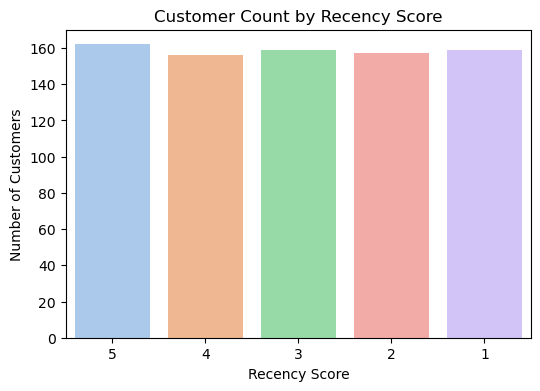

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Recency_score', data=rmf, palette='pastel')
plt.title('Customer Count by Recency Score')
plt.xlabel('Recency Score')
plt.ylabel('Number of Customers')
plt.show()

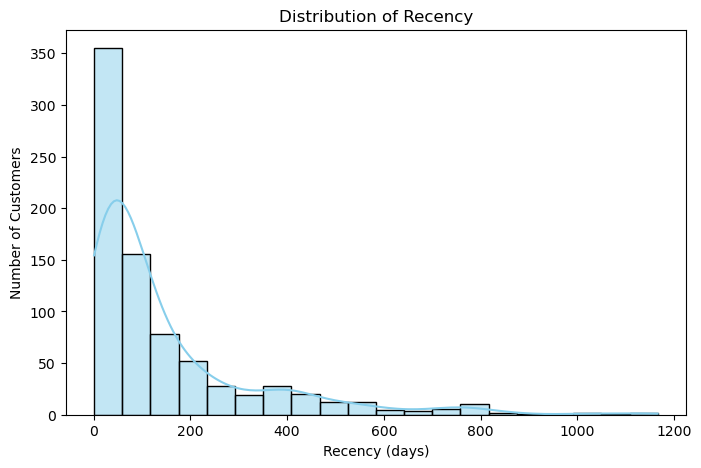

In [20]:

plt.figure(figsize=(8, 5))
sns.histplot(rmf['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.show()

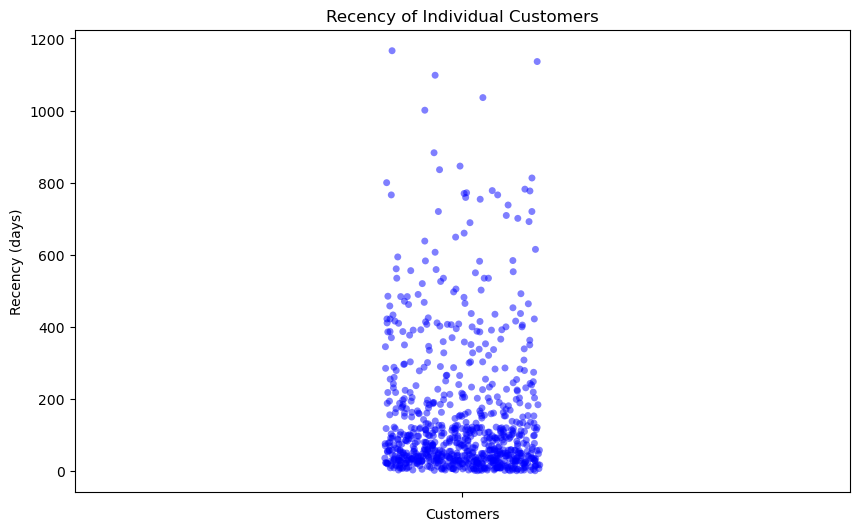

In [21]:
plt.figure(figsize=(10, 6))
sns.stripplot(y='Recency', data=rmf, color='blue', alpha=0.5, jitter=True)
plt.title('Recency of Individual Customers')
plt.ylabel('Recency (days)')
plt.xlabel('Customers')
plt.show()

In [22]:
# Combine scores into an RFM score
rmf['RMF Score'] = rmf['Recency_score'].astype(str) + rmf['Monetary_score'].astype(str) + rmf['Frequency_score'].astype(str) 

In [23]:
rmf

,Customer ID,Recency,Monetary,Frequency,Recency_score,Monetary_score,Frequency_score,RMF Score
0,AA-10315,185,5563.560,11,2,5,3,253
1,AA-10375,20,1056.390,15,5,2,4,524
2,AA-10480,260,1790.512,12,1,3,3,133
3,AA-10645,56,5086.935,18,3,5,4,354
4,AB-10015,416,886.156,6,1,1,1,111
...,...,...,...,...,...,...,...,...
788,XP-21865,44,2374.658,28,4,3,5,435
789,YC-21895,5,5454.350,8,5,5,2,552
790,YS-21880,10,6720.444,12,5,5,3,553
791,ZC-21910,55,8025.707,31,3,5,5,355


In [24]:
segmentation = {
    r'555|554|545|544|535|534|525|524|515|514' : 'Best Customers',
    r'[3-4][3-4][3-4]' : 'Loyal Customers',
    r'2[2-5][2-5]' : 'At Risk',
    r'1[1-5][1-5]' : 'Lost Customers',
}
rmf['segments'] = rmf['RMF Score'].replace(segmentation, regex=True)
print(rmf['segments'].value_counts())

Lost Customers     159
At Risk            111
Best Customers      85
Loyal Customers     79
455                 18
                  ... 
341                  1
451                  1
441                  1
241                  1
431                  1
Name: segments, Length: 63, dtype: int64


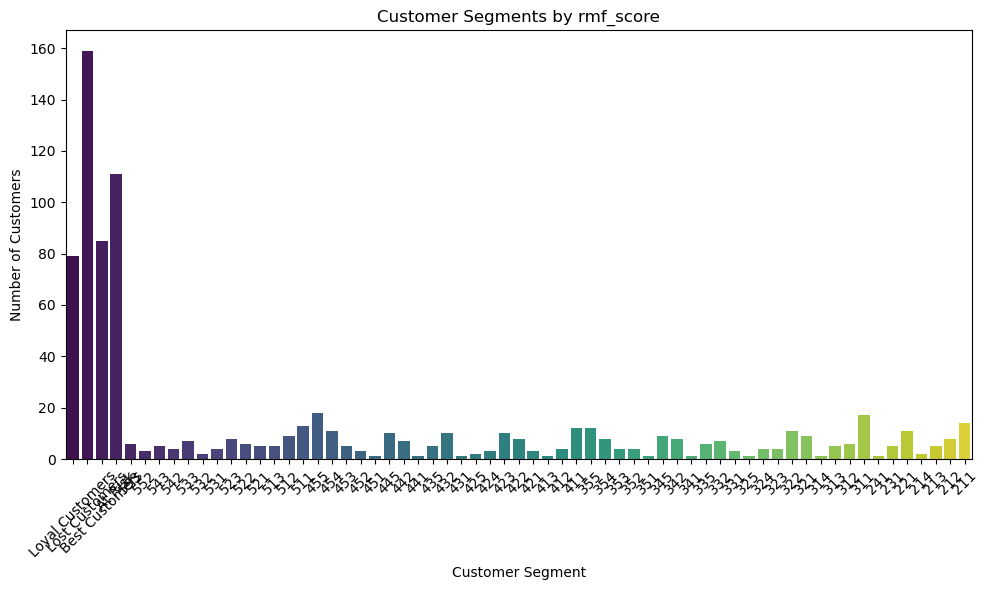

In [25]:
segment_counts = rmf['segments'].value_counts().sort_index(ascending=False) 
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segments by rmf_score')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

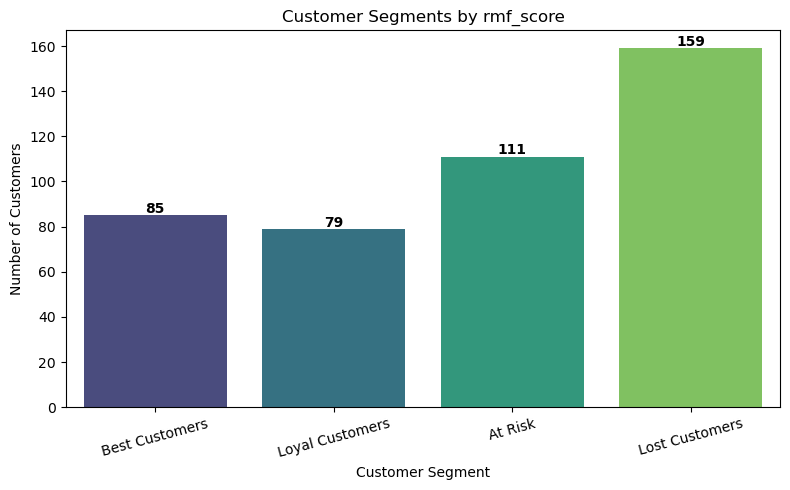

In [26]:
target_segments = ['Best Customers', 'Loyal Customers', 'At Risk', 'Lost Customers']
filtered_counts = segment_counts[segment_counts.index.isin(target_segments)]
# Optional: sort in a meaningful order
ordered = ['Best Customers', 'Loyal Customers', 'At Risk', 'Lost Customers']
filtered_counts = filtered_counts.reindex(ordered)
# Plot the filtered counts
plt.figure(figsize=(8, 5))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')
plt.title('Customer Segments by rmf_score')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.tight_layout()
for i, value in enumerate(filtered_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontweight='bold')
plt.show()

In [27]:
#Customer Cohort Analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Group by cohort (e.g., year-month)
cohort = df.groupby(['Order Year', 'Order Month']).agg({'Sales': 'sum'}).reset_index()
 

In [28]:
# Top 10 profitable products
top_10_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_10_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


<AxesSubplot:ylabel='Sales'>

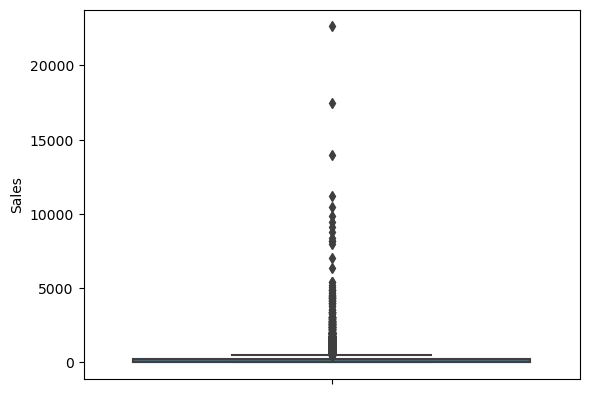

In [29]:
sns.boxplot(data =df , y='Sales')

In [30]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

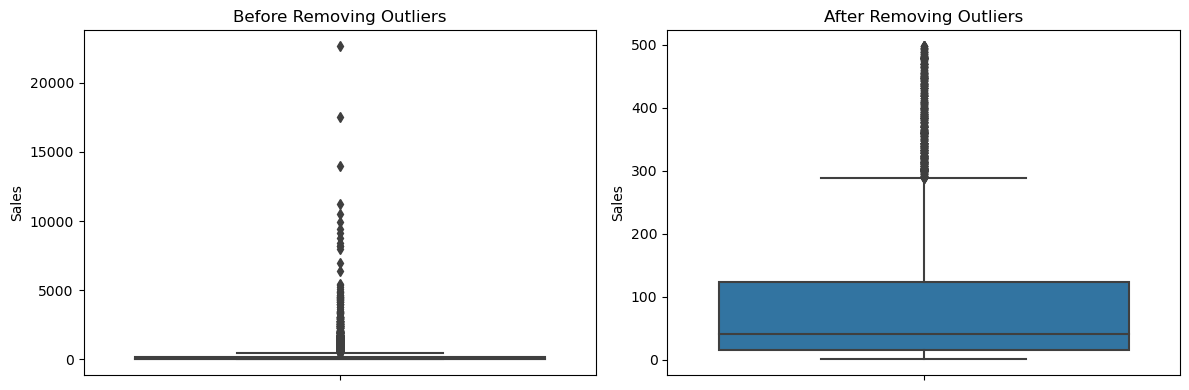

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'])
plt.title('Before Removing Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['Sales'])
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

In [41]:
df_clean.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2015,10


In [33]:
# Save RFM segments to CSV
#rmf.to_csv('rmf_segments.csv', index=False)
#df.to_csv('superstore_cleaned.csv', index=False)


In [44]:
#droping useless columns

df_clean = df_clean.drop(['Customer Name', 'Country', 'Product ID', 'Product Name','Order ID', 'Customer ID'], axis =1)


KeyError: "['Customer Name', 'Country', 'Product ID', 'Product Name', 'Order ID', 'Customer ID'] not found in axis"

In [45]:
df_clean.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month'],
      dtype='object')

In [46]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns
categorical_columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')

In [47]:
df_encoded = pd.get_dummies(df_clean, columns=['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category'])
df_encoded.head(3)

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,1,2016-11-08,2016-11-11,42420,261.960,2,0.0,41.9136,2016,11,...,0,0,0,0,0,0,0,0,0,0
2,3,2016-06-12,2016-06-16,90036,14.620,2,0.0,6.8714,2016,6,...,0,0,0,1,0,0,0,0,0,0
4,5,2015-10-11,2015-10-18,33311,22.368,2,0.2,2.5164,2015,10,...,0,0,0,0,0,0,0,1,0,0


In [49]:
X = df_encoded.drop(['Sales','Order Date','Ship Date'], axis=1)
y = df_clean['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7061, 613), (1766, 613), (7061,), (1766,))

In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 9993
Columns: 616 entries, Row ID to Sub-Category_Tables
dtypes: datetime64[ns](2), float64(3), int64(5), uint8(606)
memory usage: 5.8 MB


In [51]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
# Make predictions and evaluate the model

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')



RMSE: 48.90


In [52]:
avg_sales = df_clean['Sales'].mean()
print(f"RMSE: {rmse} | Average Sales: ${avg_sales:,.2f}")

RMSE: 48.90100855235635 | Average Sales: $92.86


In [55]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

MAE: 25.35
R2 Score: 0.82
